In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import pycocotools.mask as maskapi
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor furniture outdoor kitchen appliance accessory electronic sports person vehicle food animal


In [18]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','car']);
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
#pick one at random
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

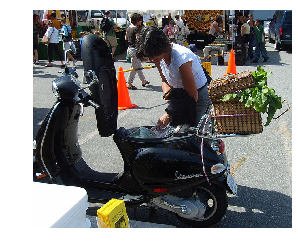

In [27]:
# load and display image
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [181]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

#dictlist = []
#for i in range(len(anns)):
#    for key, value in anns[i].items():
#            temp = [key,value]
#            dictlist.append(temp)

masks = []
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    masks.append(coco.annToMask(anns[i]))
    mask += coco.annToMask(anns[i])

#plt.imshow(mask)

#ask1 = coco.annToMask(anns[3])
#ask2 = coco.annToMask(anns[1])
#ask = mask1+mask2
#lt.imshow(mask)

#mask = coco.annToMask(anns[0])
#for i in range(len(anns)):
#    mask += coco.annToMask(anns[i])

#plt.imshow(mask)

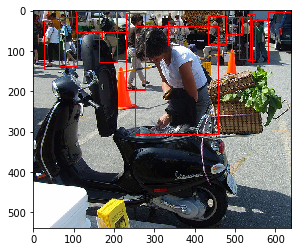

In [118]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(I)

#Encoding the masks
#  Rs     = encode( masks )
#  bbs    = toBbox( Rs )
RS = []
BB = []
Rect = []
for i in range(len(masks)):
    RS.append(maskapi.encode(masks[i]))
    BB.append(maskapi.toBbox(RS[i]))
    # Create a Rectangle patch first box
    Rect.append(patches.Rectangle((BB[i][0],BB[i][1]),BB[i][2],BB[i][3],linewidth=1,edgecolor='r',facecolor='none'))

#RS1  = maskapi.encode(mask1)
#RS2  = maskapi.encode(mask2)
##  bbs    = toBbox( Rs )
#bbs1 = maskapi.toBbox( RS1 )
#bbs2 = maskapi.toBbox( RS2 )

# Create figure and axes
#fig,ax = plt.subplots(1)

# Display the image
#ax.imshow(I)

# Create a Rectangle patch first box
#rect1 = patches.Rectangle((bbs1[0],bbs1[1]),bbs1[2],bbs1[3],linewidth=1,edgecolor='r',facecolor='none')

# Create a Rectangle patch second box
#rect2 = patches.Rectangle((bbs2[0],bbs2[1]),bbs2[2],bbs2[3],linewidth=1,edgecolor='g',facecolor='none')

# Add the patch to the Axes
for i in range(len(Rect)):
    ax.add_patch(Rect[i])

plt.show()

In [194]:
import math

#Union box of the two objects
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[0]+boxA[2], boxB[0]+boxB[2])
    yB = min(boxA[1]+boxA[3], boxB[1]+boxB[3])
 
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
 
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = boxA[2]*boxA[3]
    boxBArea = boxB[2]*boxB[3]
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
 
    # return the intersection over union value
    return iou

#Euclidean Distance between the centers of the bounding boxes
def euclidean_distance(boxA,boxB):
    #Take the center of the boxes.
    x1 = (boxA[0]+boxA[2])/2 
    y1 = (boxA[1]+boxA[3])/2
    x2 = (boxB[0]+boxB[2])/2
    y2 = (boxB[1]+boxB[3])/2
    
    eu_distance = math.sqrt((x1-x2)**2 + (y1-y2)**2)
    
    return eu_distance

def area_BB(box):
    aa = box[2]*box[3]
    return aa

#o = bb_intersection_over_union(bbs1,bbs2)
#print(o)

In [200]:
#Saving the intersections of all the combinations of IOU's of bounding boxes
Iou = []
NIou = []
for i in range(len(BB)):
    for j in range(len(BB)):
        if(i != j):
            if(bb_intersection_over_union(BB[i],BB[j]) != 0):
                Iou.append({(i, j) : bb_intersection_over_union(BB[i],BB[j]), 'euclidean_distance' : euclidean_distance(BB[i],BB[j]),'area of first ' : area_BB(BB[i]) , 'area of second' : area_BB(BB[j])})
            else:
                NIou.append({(i, j) : bb_intersection_over_union(BB[i],BB[j]), 'euclidean_distance' : euclidean_distance(BB[i],BB[j]),'area of first ' : area_BB(BB[i]) , 'area of second' : area_BB(BB[j])})     

In [201]:
#print (list(list(Iou[0])[0]))
#printing the overlapping bounding box combinations
print (Iou)

[{(0, 5): 0.015517936316001612, 'euclidean_distance': 32.20636583037583, 'area of first ': 5626.0, 'area of second': 4452.0}, {(1, 3): 0.23532818532818534, 'euclidean_distance': 39.92492955535426, 'area of first ': 7128.0, 'area of second': 5670.0}, {(1, 4): 0.012237339988728765, 'euclidean_distance': 76.96914966400499, 'area of first ': 7128.0, 'area of second': 5445.0}, {(1, 11): 0.015384615384615385, 'euclidean_distance': 34.56153931757091, 'area of first ': 7128.0, 'area of second': 462.0}, {(1, 13): 0.03155768745266347, 'euclidean_distance': 74.11140263144397, 'area of first ': 7128.0, 'area of second': 9216.0}, {(2, 7): 0.02148835900682282, 'euclidean_distance': 111.44954015158609, 'area of first ': 54940.0, 'area of second': 3150.0}, {(2, 8): 0.02434077079107505, 'euclidean_distance': 120.47510116202434, 'area of first ': 54940.0, 'area of second': 1620.0}, {(2, 13): 0.06933795586372425, 'euclidean_distance': 105.21525554785295, 'area of first ': 54940.0, 'area of second': 9216.

In [202]:
#Printing the Non-overlapping bounding boxes
print(NIou)

[{(0, 1): 0.0, 'euclidean_distance': 202.3116407921205, 'area of first ': 5626.0, 'area of second': 7128.0}, {(0, 2): 0.0, 'euclidean_distance': 137.77245733454853, 'area of first ': 5626.0, 'area of second': 54940.0}, {(0, 3): 0.0, 'euclidean_distance': 216.453228204155, 'area of first ': 5626.0, 'area of second': 5670.0}, {(0, 4): 0.0, 'euclidean_distance': 266.1789811386316, 'area of first ': 5626.0, 'area of second': 5445.0}, {(0, 6): 0.0, 'euclidean_distance': 46.93080012102926, 'area of first ': 5626.0, 'area of second': 2166.0}, {(0, 7): 0.0, 'euclidean_distance': 81.891696770796, 'area of first ': 5626.0, 'area of second': 3150.0}, {(0, 8): 0.0, 'euclidean_distance': 139.7014674225006, 'area of first ': 5626.0, 'area of second': 1620.0}, {(0, 9): 0.0, 'euclidean_distance': 281.8598942737331, 'area of first ': 5626.0, 'area of second': 6069.0}, {(0, 10): 0.0, 'euclidean_distance': 52.952809179494906, 'area of first ': 5626.0, 'area of second': 2625.0}, {(0, 11): 0.0, 'euclidean_

In [187]:
print (euclidean_distance(BB[0],BB[1]))

202.3116407921205


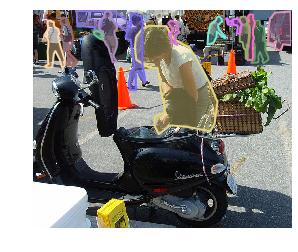

In [161]:
# load and display instance annotations
plt.imshow(I); 
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [162]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


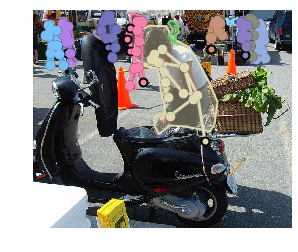

In [163]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [164]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


A woman digging through the storage compartment on her moped.
A woman digs under the seat of a moped.
A woman looking in the compartment of a moped.
A woman puts her market shopping in her motor scooter seat
A woman checks out a motorcycle in a parking lot


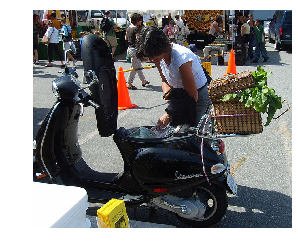

In [165]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()